In [6]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')
# movies

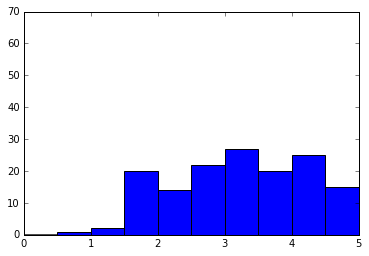

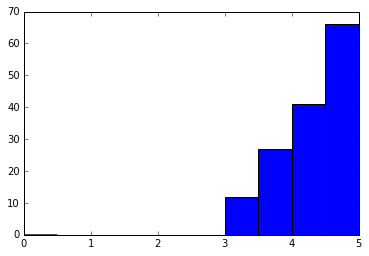

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(movies['Metacritic_norm_round'], range=(0,5))
plt.ylim(0,70)
plt.show()

plt.hist(movies['Fandango_Stars'], range=(0,5))
plt.ylim(0,70)
plt.show()

While both plots are skewed to the right Metartic is much closer to a normal distribution. Fandango stars are skewed heavily to the right or towards higher ratings.

In [8]:
meta_mean = movies['Metacritic_norm_round'].mean()
print("Metacritic: "+str(meta_mean))
fand_mean = movies['Fandango_Stars'].mean()
print("Fandango: "+str(fand_mean))

Metacritic: 2.97260273973
Fandango: 4.08904109589


In [9]:
meta_median = movies['Metacritic_norm_round'].median()
print("Metacritic: "+str(meta_median))
fand_median = movies['Fandango_Stars'].median()
print("Fandango: "+str(fand_median))

Metacritic: 3.0
Fandango: 4.0


In [10]:
import numpy as np
stand_dev = np.std(movies['Metacritic_norm_round'])
print("Meta Standard Deviation: "+str(stand_dev))
stand_dev = np.std(movies['Fandango_Stars'])
print("Fandango Standard Deviation: "+str(stand_dev))

Meta Standard Deviation: 0.987561029704
Fandango Standard Deviation: 0.53853216127


The Fandango mean is larger than the median because there is an absence of smaller values. The skew towards more positive favourable reviews makes the mean greater.

The standard deviation of the Metacritic reviews is larger because the reviews are more evenly distributed and therefore more variable.

The mean for Fandango is much higher because on average Fandango reviews are much more likely to be higher.

In [11]:
fm_diff = abs(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])

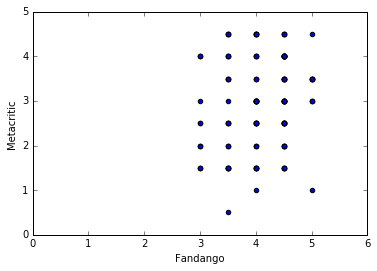

In [12]:
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.xlim(0,6)
plt.xlabel('Fandango')
plt.ylabel('Metacritic')
plt.ylim(0,5)
plt.show()

In [13]:
movies['fm_diff'] = fm_diff

In [14]:
print(movies.sort_values(['fm_diff'], ascending=False).head())

                        FILM  RottenTomatoes  RottenTomatoes_User  Metacritic  \
3     Do You Believe? (2015)              18                   84          22   
85         Little Boy (2015)              20                   81          30   
47              Annie (2014)              27                   61          33   
19             Pixels (2015)              17                   54          27   
134  The Longest Ride (2015)              31                   73          33   

     Metacritic_User  IMDB  Fandango_Stars  Fandango_Ratingvalue  RT_norm  \
3                4.7   5.4             5.0                   4.5     0.90   
85               5.9   7.4             4.5                   4.3     1.00   
47               4.8   5.2             4.5                   4.2     1.35   
19               5.3   5.6             4.5                   4.1     0.85   
134              4.8   7.2             4.5                   4.5     1.55   

     RT_user_norm   ...     RT_norm_round  RT_user

In [21]:
from scipy import stats

r_value = scipy.stats.pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
print(r_value)

(0.17844919073895918, 0.031161516228523815)


Both services aim to give users a rating which will tell them how likely they are to enjoy a movie. The fact they are so poorly correlated suggests one or both services is using an ineffcient way of calculating their ratings. High correlation would suggest some consensus on which movies are good or bad. Consensus would show a high probability the ratings are correct.

In [27]:
meta_fan_lrges = scipy.stats.linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

pred_3 = 3 * meta_fan_lrges.slope + meta_fan_lrges.intercept
print(pred_3)
pred_1 = 1 * meta_fan_lrges.slope + meta_fan_lrges.intercept
print(pred_1)
pred_5 = 5 * meta_fan_lrges.slope + meta_fan_lrges.intercept
print(pred_5)

4.09170715282
3.89708499687
4.28632930877


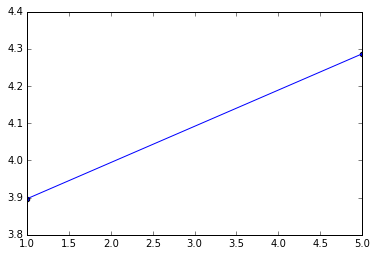

In [32]:

prediction_scatter = plt.scatter([1.0,5.0], [pred_1, pred_5])
plt.plot([1.0,5.0], [pred_1, pred_5])
plt.xlim([1,5])
plt.show()